# Importing main modules that will be used

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Data Cleaning
Store the dataset into dataframe `df`. After reading the data, we drop the `Id` column from the DataFrame using the `drop()` method

In [3]:
df = pd.read_csv("House Price Prediction.csv")
df = df.drop(['Id'],axis=1)
df.tail()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


## Removing rows with missing values NaN from the DataFrame


In [4]:
df = df.dropna()
df.tail()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0
1459,20,RL,9937,Inside,1Fam,6,1965,1965,HdBoard,290.0,1256.0,147500.0


## Boxplot for Prices with quartiles and outliers
This output represents the distribution of sale prices in the dataset, including median, quartiles, and potential outliers, displayed in a horizontal box plot.

<Axes: xlabel='SalePrice'>

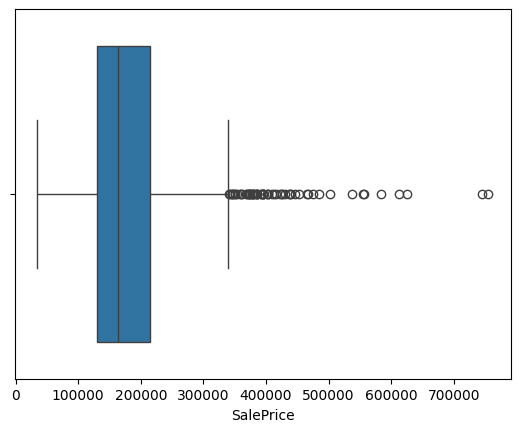

In [5]:
sns.boxplot(data=df['SalePrice'], orient='h')  # 'h' for horizontal orientation

## Boxplot for (Prices < 500k) with quartiles and outliers
The output represents the distribution of sale prices in the dataset only less than $500,000 and generates a horizontal box plot to visualize the distribution of these filtered sale prices.

<Axes: xlabel='SalePrice'>

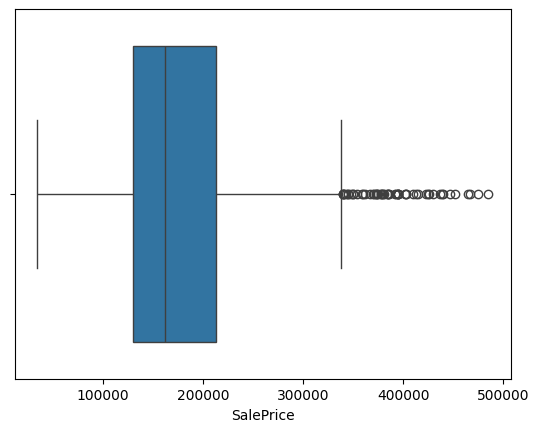

In [6]:
df = df[df['SalePrice'] < 500000]
sns.boxplot(data=df['SalePrice'], orient='h')  # 'h' for horizontal orientation

In [7]:
df.to_csv("cleaned_dataset.csv",index = False)

---

# Data Analysis

Printing all the unique values except for specific columns such as `YearBuilt`, `YearRemodAdd`, `BsmtFinSF2`, `TotalBsmtSF`, `SalePrice`, and `LotArea`.

In [8]:
for column in df.columns:
  if(column == "YearBuilt"
     or column == "YearRemodAdd"
     or column == "BsmtFinSF2"
     or column == "TotalBsmtSF"
     or column == "SalePrice"
     or column == "LotArea"):
     continue
  print(f"Unique values in {column}:")
  print(df[column].unique())
  print()


Unique values in MSSubClass:
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

Unique values in MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values in LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Unique values in BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Unique values in OverallCond:
[5 8 6 7 4 2 3 9 1]

Unique values in Exterior1st:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']




## getting the Key Columns (numerical ones with each other and strings with each other)

In [9]:
categorical_cols = [col for col in df.columns if df.dtypes[col] == 'object']
numerical_cols = [col for col in df.columns if df.dtypes[col] != 'object']

## Boxblots for quartiles and outliers
those boxplots visualize the data in terms of quartiles, and identify outliers in the dataset, when exist.

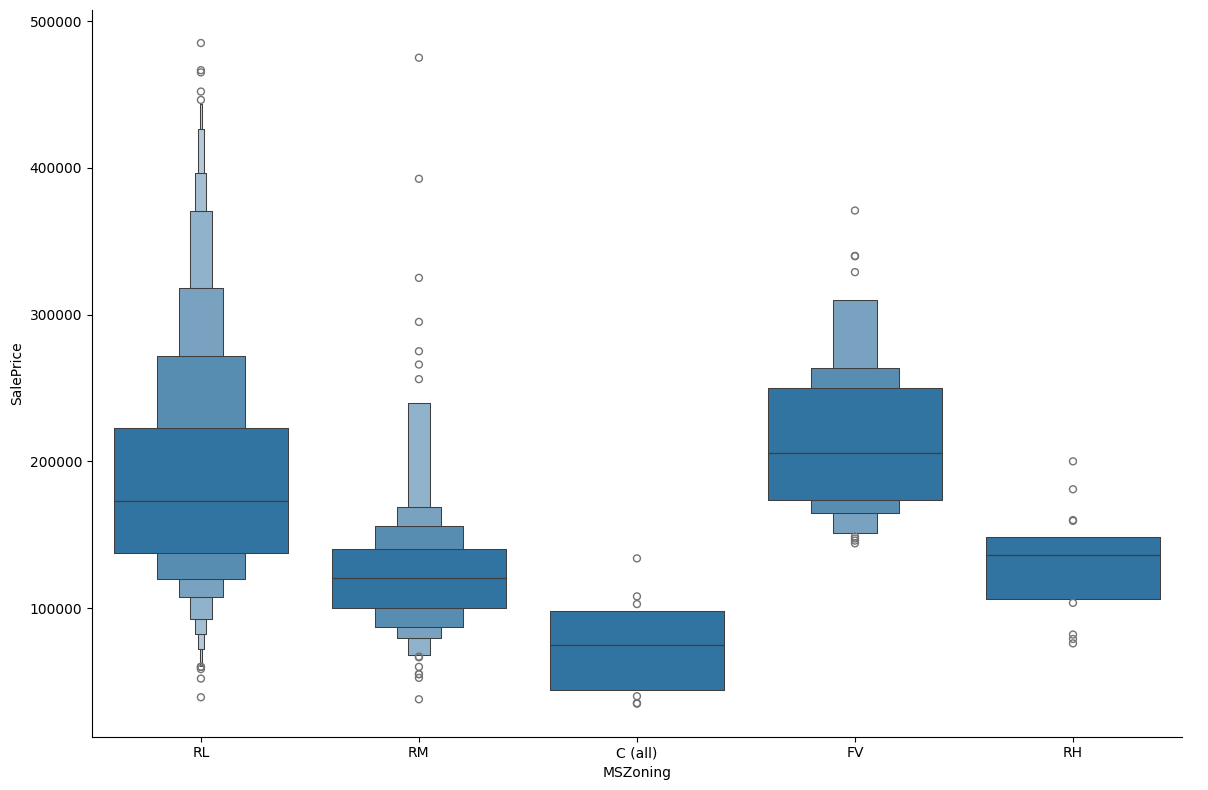

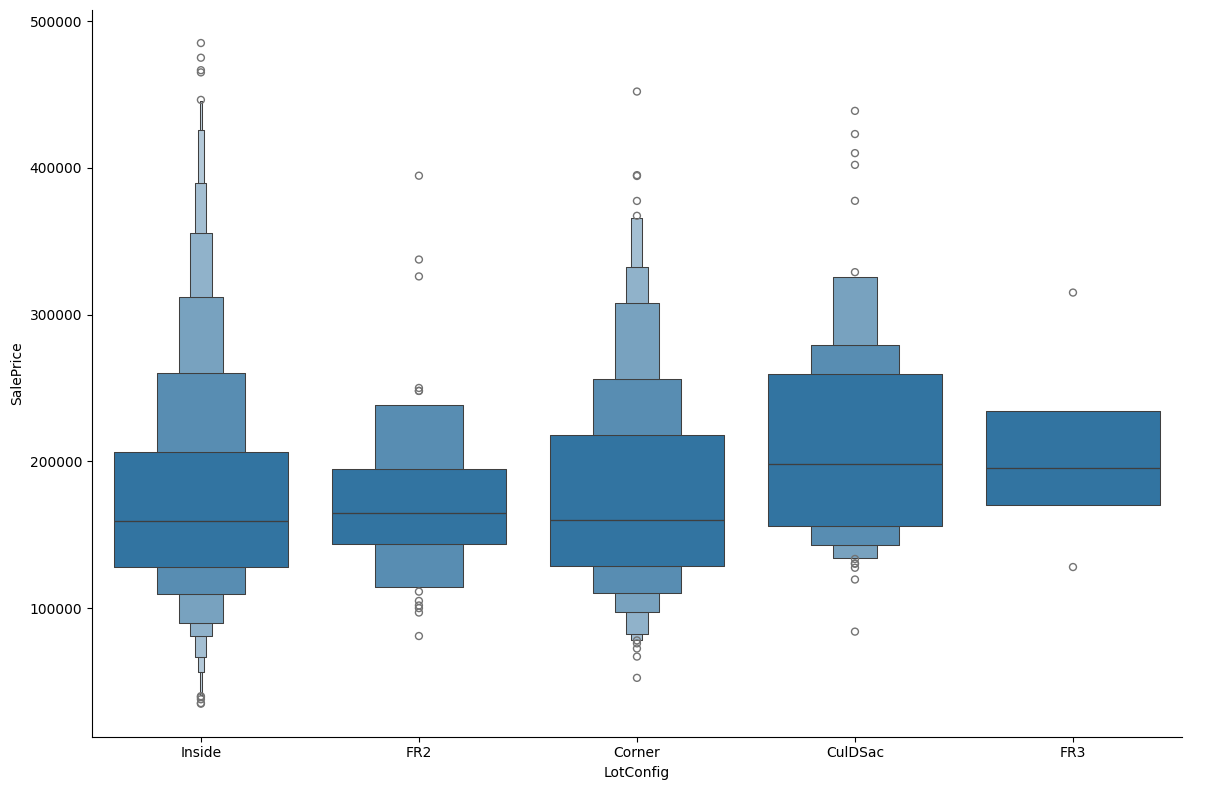

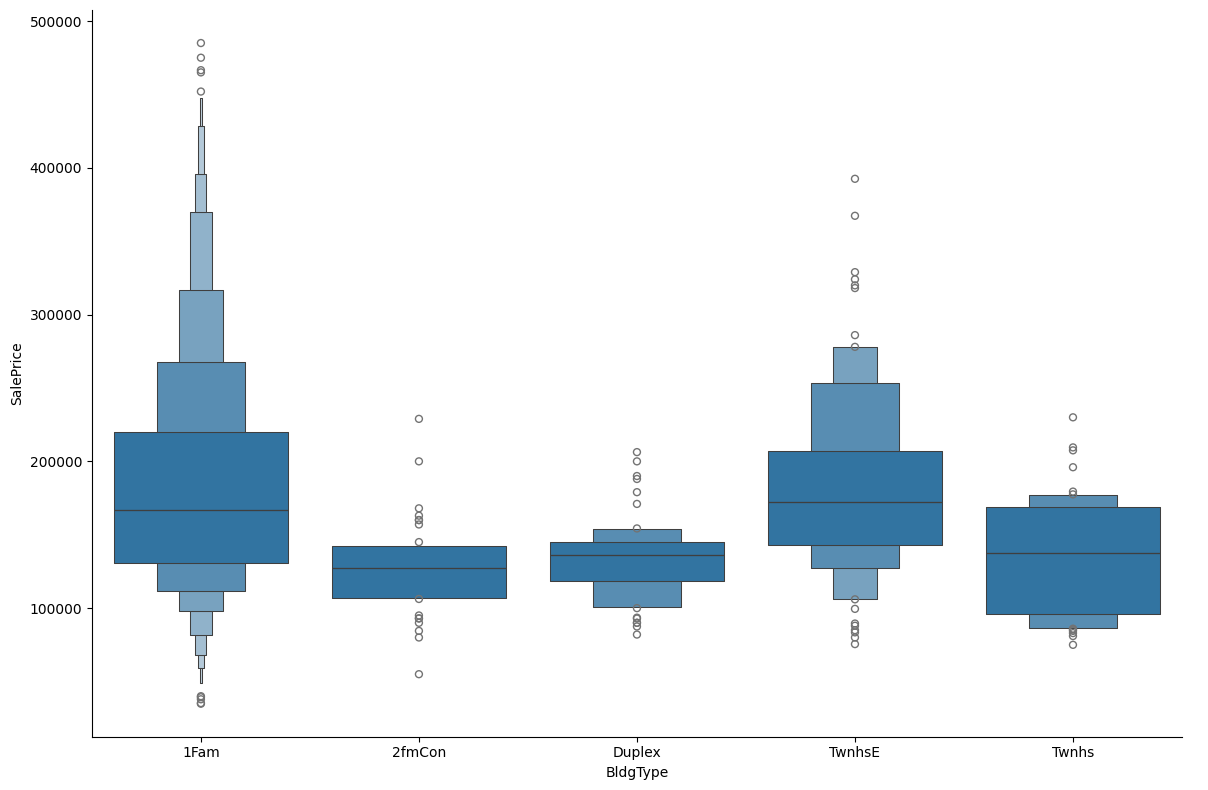

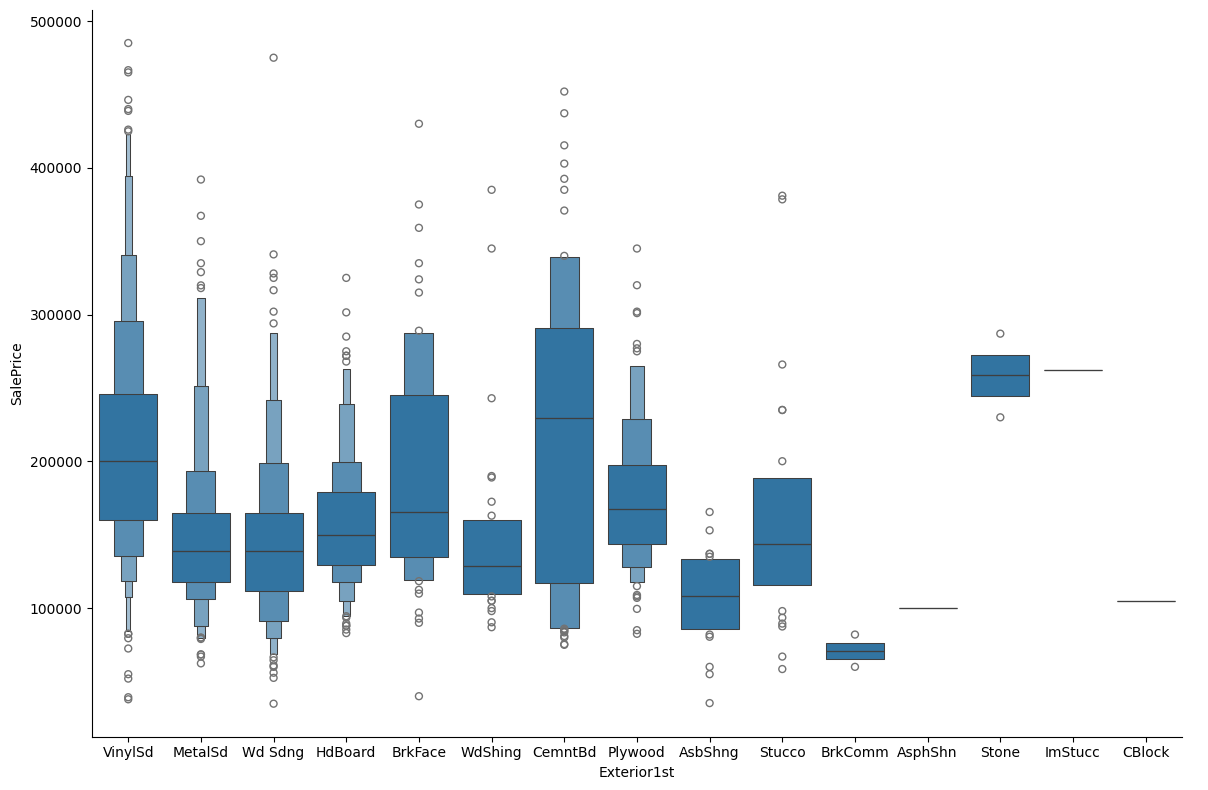

In [10]:
# Box Plot
for icol in categorical_cols:
    sns.catplot(x=icol, y="SalePrice", data=df,kind = 'boxen',height = 8,aspect=1.5)

## Plot of the distribution of each variable that can affect the price with corresponding price within the context of pairplots
those plots are showing the actual values of the cost distribution over each category and those categories distribution.

**Some Notes:**
1. More recent houses' cost are bigger than older ones as seen in the YearBuilt variable.
2. The YearRemodAdd have the same note as previous one, whenever the Remodal Date is recent then the price is higher.
3. LotArea doesn't affect the price directly.
4. Whenever the Overall condition is higher(the house is condition is better) then the price is higher.

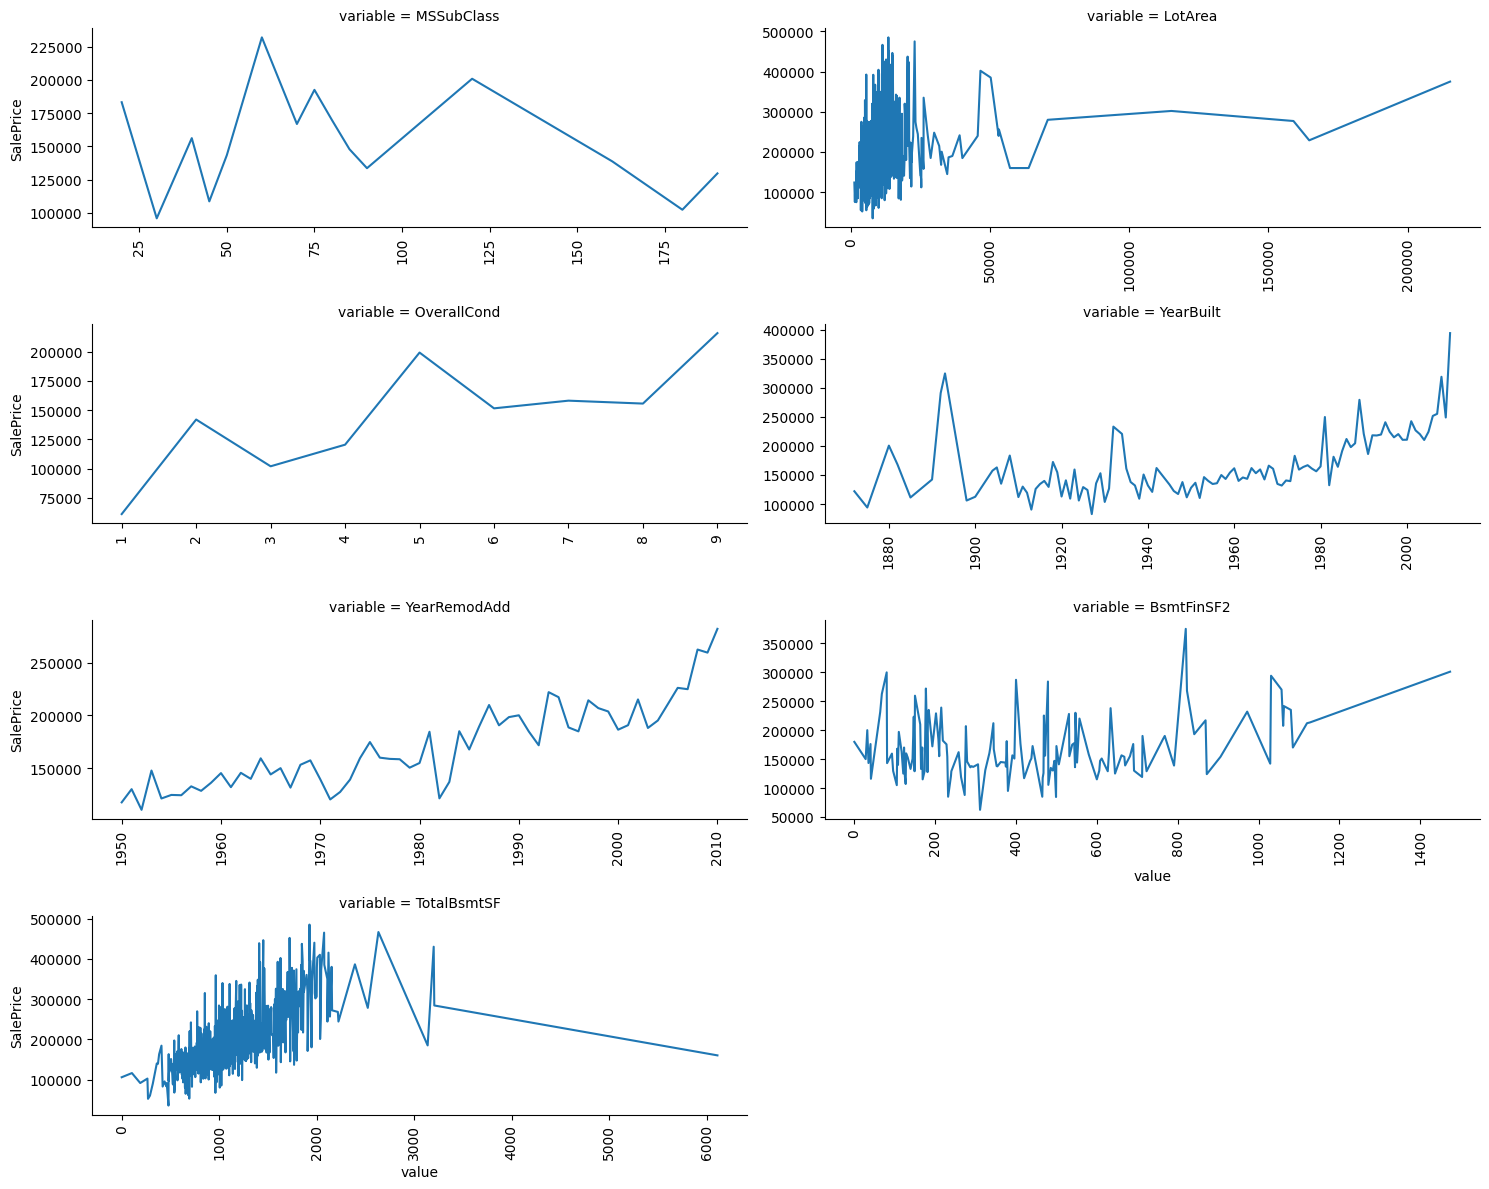

In [11]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

#f = pd.melt(train, id_vars=['SalePrice'], value_vars=numerical_cols+qual_encoded)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=numerical_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, aspect=2.5)
g = g.map(pairplot, "value", "SalePrice")

## Plotting how many unique values in each table
each column has some unique values and the coming block is plotting how many  unique valuesin each column that should may affect the price afterwards (i.e. the specification of the apartment or the house).

The plot shows that Exterior1st has around 15 unique categories and other features have around 5 unique categories.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

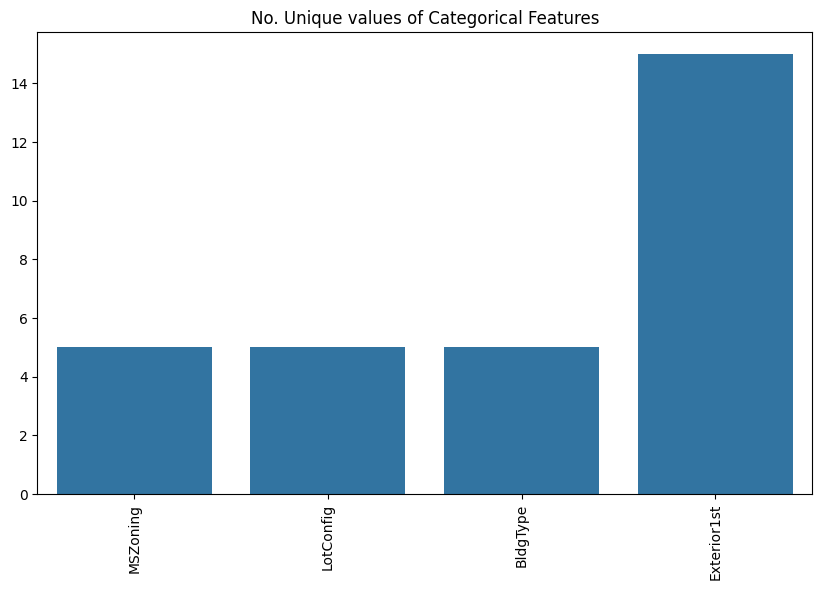

In [12]:
unique_values = []
for col in categorical_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=categorical_cols, y=unique_values)


## Plot of each unique value counts within the context of Bargraphs
each column has some unique values and the coming block is plotting how many this unique value has been repeated.

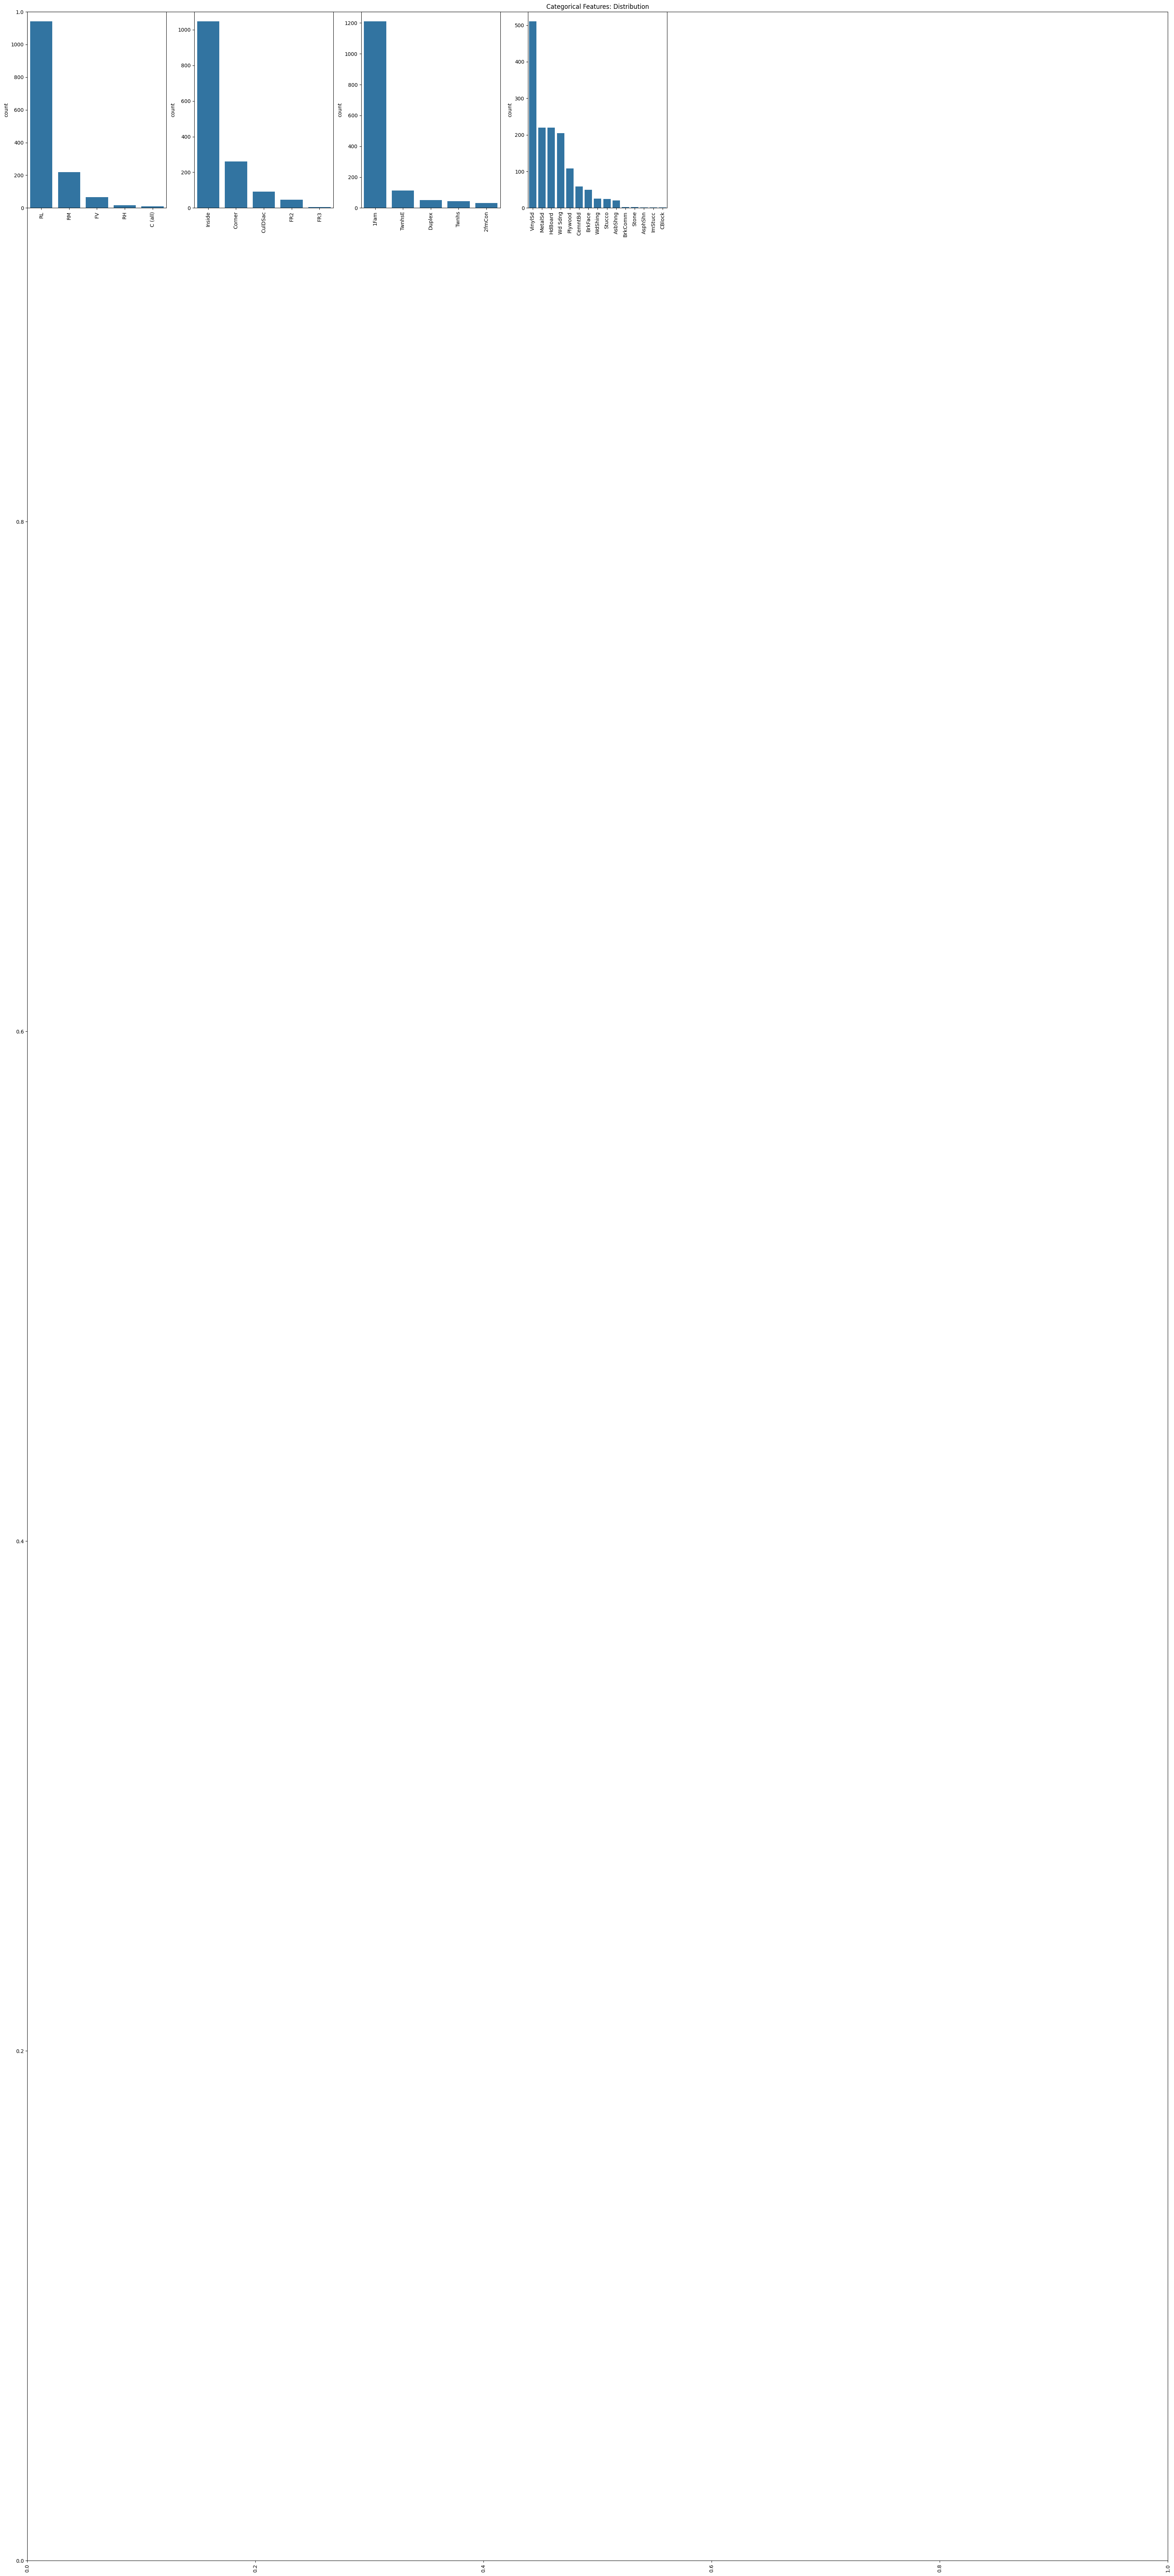

In [13]:
plt.figure(figsize=(40, 90))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in categorical_cols:
    y = df[col].value_counts()
    plt.subplot(11, 7, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1